Chapter 04

# 色子的不同玩法
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码通过生成不同二维数组 \(X1\) 和 \(X2\) 的组合来构建数据框 `df`，并在每组组合上计算多种数学运算，包括平方、和、均值、中心化均值、乘积、商、差、绝对差以及圆形等。然后，它使用 `plot_contour` 和 `plot_stem` 函数来分别绘制等高线图和概率质量函数 (PMF) 的茎叶图，展示每种计算的分布情况。该代码的具体步骤如下：

1. 定义并生成 \(X1\) 和 \(X2\) 的组合数据。
2. 在数据框 `df` 中创建新的列，以不同的数学运算方式生成特征。
3. 使用 `plot_contour` 函数绘制等高线图，以直观呈现特征值的分布。
4. 使用 `plot_stem` 函数绘制 PMF 图，显示每种特征的概率分布。



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
p = plt.rcParams  # 获取默认绘图参数
p["font.sans-serif"] = ["Roboto"]  # 设置无衬线字体为 Roboto
p["font.weight"] = "light"  # 设置字体粗细为 light
p["ytick.minor.visible"] = True  # 显示 y 轴的小刻度
p["xtick.minor.visible"] = True  # 显示 x 轴的小刻度
p["axes.grid"] = True  # 启用坐标轴网格
p["grid.color"] = "0.5"  # 设置网格颜色为灰色
p["grid.linewidth"] = 0.5  # 设置网格线宽度

## 工具函数：绘制概率质量函数 (PMF)

In [3]:
def plot_stem(df, column):
    pmf_df = df[column].value_counts().to_frame().sort_index() / len(df) # 计算指定列的概率质量函数
    fig, ax = plt.subplots()
    centroid = np.sum(pmf_df['count'] * pmf_df.index) # 计算质心（平均值）
    plt.stem(pmf_df.index, pmf_df['count'].astype(float))  # 绘制茎叶图
    plt.vlines(centroid, 0, 0.3, colors='r', linestyles='--') # 绘制质心的垂线
    plt.ylim(0, 0.3) # 设置y轴范围
    plt.xlim(-5, 40) # 设置x轴范围
    plt.ylabel('Probability, PMF') # 设置y轴标签
    plt.title(column + '; average = ' + '{0:.2f}'.format(centroid)) # 设置标题

## 工具函数：绘制等高线图

In [4]:
def plot_contour(XX1, XX2, df, column, XX1_fine, XX2_fine, YY):
    XX1_ = XX1.ravel() # 将数组展平
    XX2_ = XX2.ravel() # 将数组展平
    levels = np.sort(df[column].unique()) # 获取等高线的级别
    print(list(levels)) # 测试输出
    fig, ax = plt.subplots()
    plt.scatter(XX1_, XX2_) # 绘制散点图
    CS = plt.contour(XX1_fine, XX2_fine, YY, levels=levels, cmap='rainbow') # 绘制等高线图
    plt.contour(XX1_fine, XX2_fine, YY, levels=levels, cmap='rainbow') # 绘制等高线图
    ax.clabel(CS, inline=True, fontsize=12, fmt="%.2f") # 添加等高线标签
    ax.set_aspect('equal', adjustable='box') # 设置等比例坐标系
    plt.grid(True) # 显示网格
    plt.xlim(1 - 0.5, 6 + 0.5) # 设置x轴范围
    plt.ylim(1 - 0.5, 6 + 0.5) # 设置y轴范围
    ax.spines['top'].set_visible(False) # 隐藏顶部边框
    ax.spines['right'].set_visible(False) # 隐藏右侧边框
    ax.spines['bottom'].set_visible(False) # 隐藏底部边框
    ax.spines['left'].set_visible(False) # 隐藏左侧边框
    ax.tick_params(axis="y", direction='in', length=8) # 设置y轴刻度方向
    ax.tick_params(axis="x", direction='in', length=8) # 设置x轴刻度方向
    plt.xlabel('$X_1$') # 设置x轴标签
    plt.ylabel('$X_2$') # 设置y轴标签
    plt.title(column) # 设置标题

## 准备数据

In [5]:
X1_array = np.arange(1, 6 + 1) # 生成X1数组
X2_array = np.arange(1, 6 + 1) # 生成X2数组

X1_fine_array = np.linspace(0.5, 6.5, 100) # 生成细化的X1数组
X2_fine_array = np.linspace(0.5, 6.5, 100) # 生成细化的X2数组

XX1, XX2 = np.meshgrid(X1_array, X2_array) # 生成X1和X2的网格
XX1_fine, XX2_fine = np.meshgrid(X1_fine_array, X2_fine_array) # 生成细化的网格

XX1_ = XX1.ravel() # 将网格展平
XX2_ = XX2.ravel() # 将网格展平

df = pd.DataFrame(np.column_stack((XX1_, XX2_)), columns=['X1', 'X2']) # 创建数据框

## X1

[1, 2, 3, 4, 5, 6]


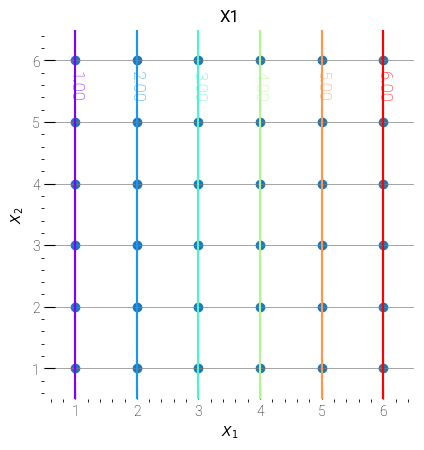

In [6]:

YY_X1_only = XX1_fine # 设置Y为X1的细化数组
plot_contour(XX1, XX2, df, 'X1', XX1_fine, XX2_fine, YY_X1_only) # 绘制等高线图

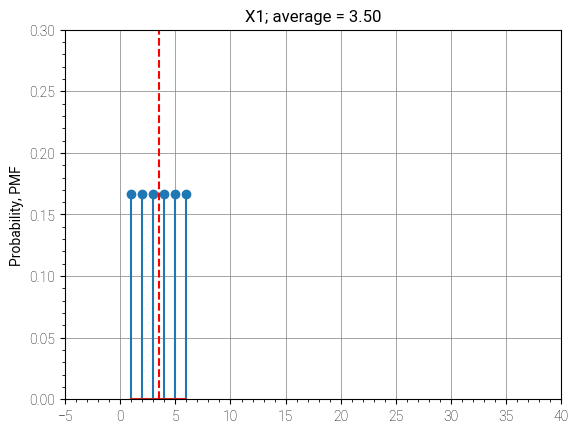

In [7]:
plot_stem(df, 'X1') # 绘制X1的茎叶图

## X1的平方

[1, 4, 9, 16, 25, 36]


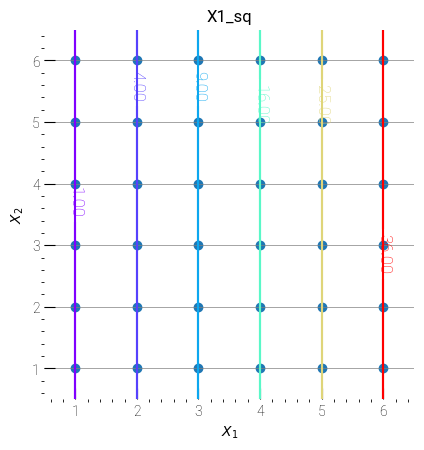

In [8]:
df['X1_sq'] = df['X1'] ** 2 # 计算X1的平方
YY_X1_sq = XX1_fine ** 2 # 设置Y为X1的平方
plot_contour(XX1, XX2, df, 'X1_sq', XX1_fine, XX2_fine, YY_X1_sq) # 绘制等高线图

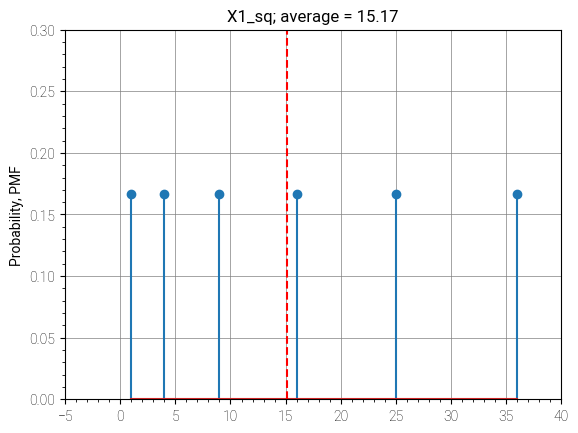

In [9]:
plot_stem(df, 'X1_sq') # 绘制X1的平方的茎叶图

## X1和X2的和

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


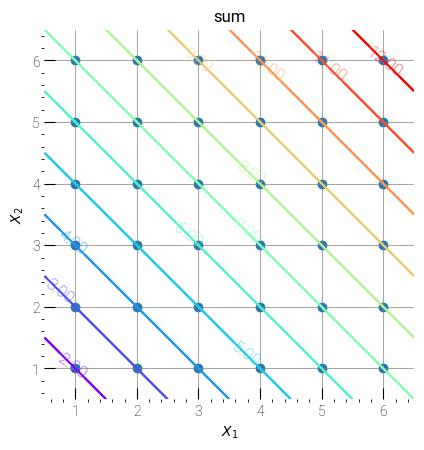

In [10]:
df['sum'] = (df['X1'] + df['X2']) # 计算X1和X2的和
YY_sum = XX1_fine + XX2_fine # 设置Y为X1和X2的和
plot_contour(XX1, XX2, df, 'sum', XX1_fine, XX2_fine, YY_sum) # 绘制等高线图

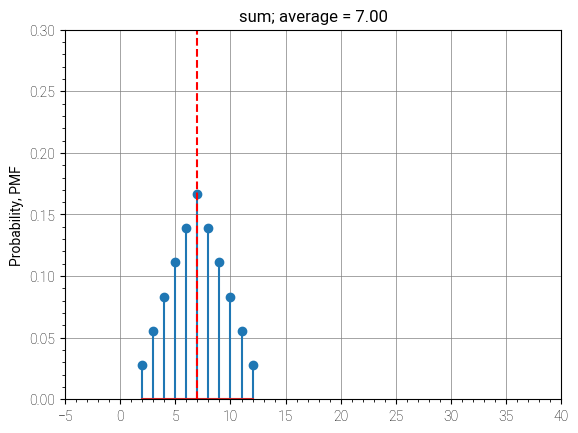

In [11]:
plot_stem(df, 'sum') # 绘制和的茎叶图

## X1和X2的均值

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]


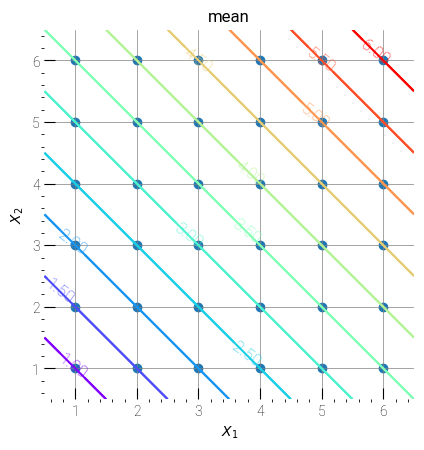

In [12]:
df['mean'] = (df['X1'] + df['X2']) / 2 # 计算均值
YY_mean = (XX1_fine + XX2_fine) / 2 # 设置Y为均值
plot_contour(XX1, XX2, df, 'mean', XX1_fine, XX2_fine, YY_mean) # 绘制等高线图

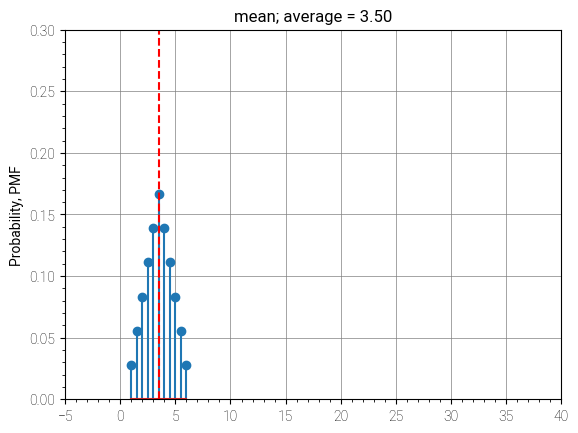

In [13]:
plot_stem(df, 'mean') # 绘制均值的茎叶图

## X1和X2的中心化均值

[-2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5]


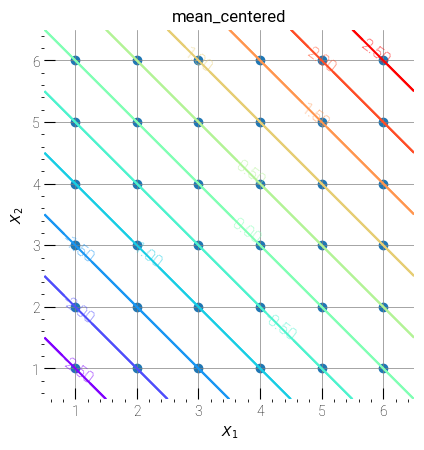

In [14]:
df['mean_centered'] = (df['X1'] + df['X2'] - 7) / 2 # 计算中心化均值
YY_mean_centered = (XX1_fine + XX2_fine - 7) / 2 # 设置Y为中心化均值
plot_contour(XX1, XX2, df, 'mean_centered', XX1_fine, XX2_fine, YY_mean_centered) # 绘制等高线图

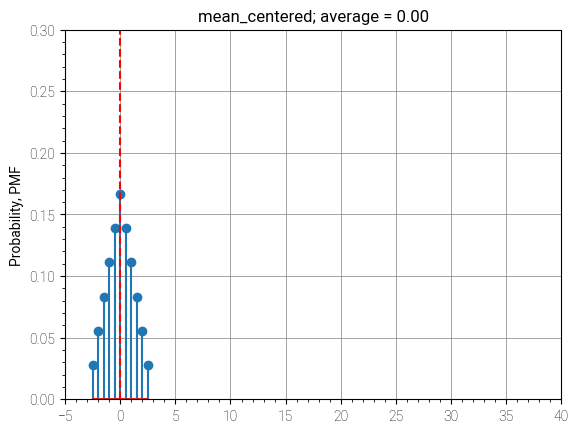

In [15]:
plot_stem(df, 'mean_centered') # 绘制中心化均值的茎叶图

## X1和X2的乘积

[1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15, 16, 18, 20, 24, 25, 30, 36]


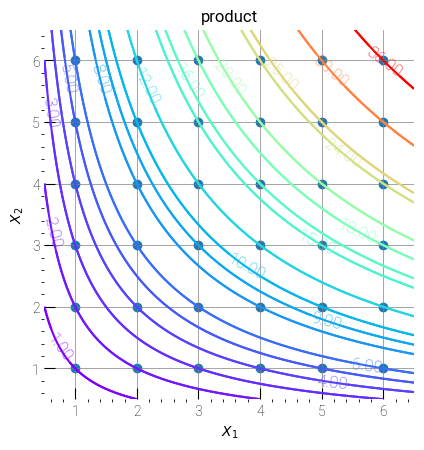

In [16]:
df['product'] = df['X1'] * df['X2'] # 计算乘积
YY_product = XX1_fine * XX2_fine # 设置Y为乘积
plot_contour(XX1, XX2, df, 'product', XX1_fine, XX2_fine, YY_product) # 绘制等高线图

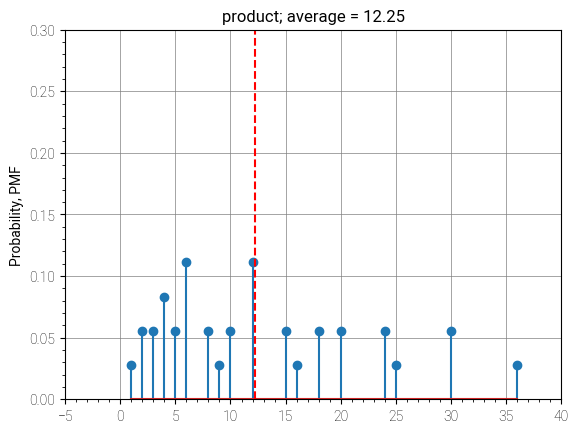

In [17]:
plot_stem(df, 'product') # 绘制乘积的茎叶图

## X1除以X2

[0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.4, 0.5, 0.6, 0.6666666666666666, 0.75, 0.8, 0.8333333333333334, 1.0, 1.2, 1.25, 1.3333333333333333, 1.5, 1.6666666666666667, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0]


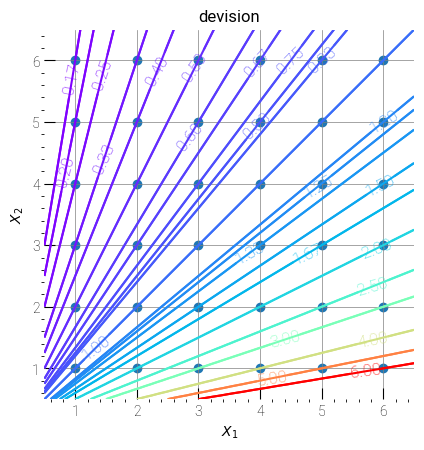

In [18]:
df['devision'] = df['X1'] / df['X2'] # 计算商
YY_devision = XX1_fine / XX2_fine # 设置Y为商
plot_contour(XX1, XX2, df, 'devision', XX1_fine, XX2_fine, YY_devision) # 绘制等高线图

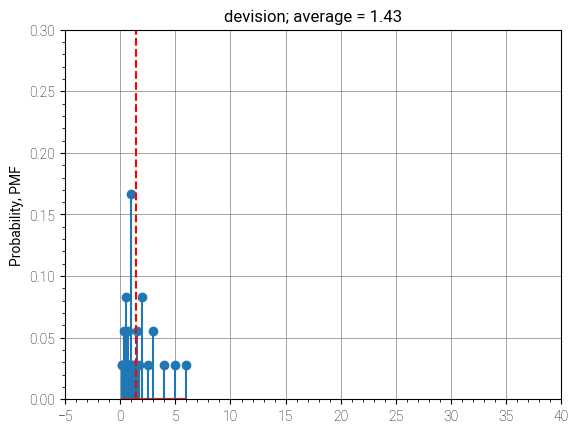

In [19]:
plot_stem(df, 'devision') # 绘制商的茎叶图

## X1减去X2

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]


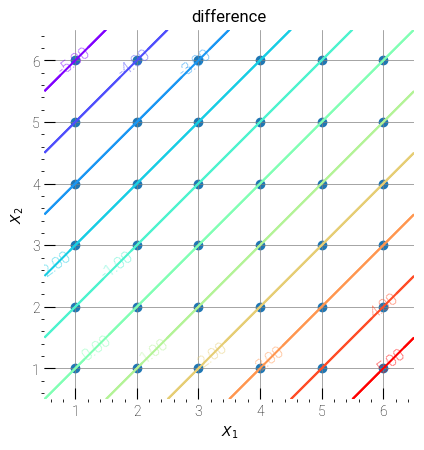

In [20]:
df['difference'] = df['X1'] - df['X2'] # 计算差
YY_difference = XX1_fine - XX2_fine # 设置Y为差
plot_contour(XX1, XX2, df, 'difference', XX1_fine, XX2_fine, YY_difference) # 绘制等高线图

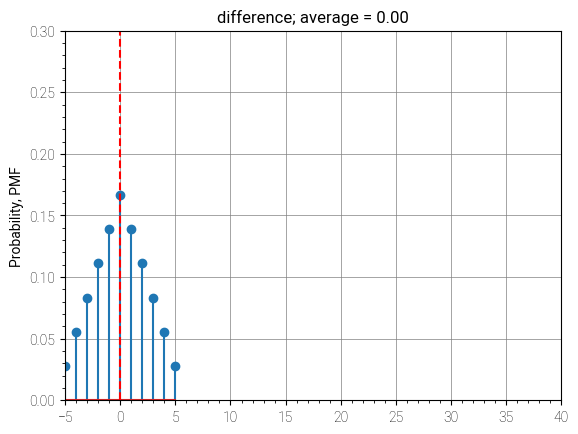

In [21]:
plot_stem(df, 'difference') # 绘制差的茎叶图

## X1和X2的绝对差

[0, 1, 2, 3, 4, 5]


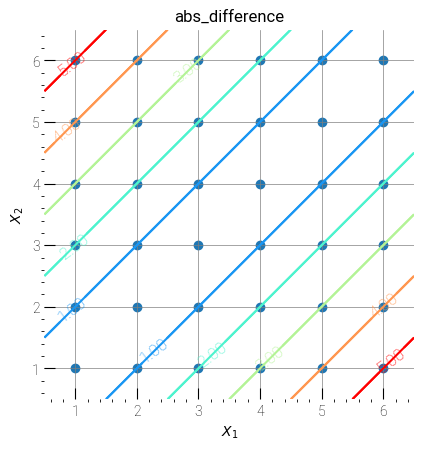

In [22]:
df['abs_difference'] = np.abs(df['X1'] - df['X2']) # 计算绝对差
YY_abs_difference = np.abs(XX1_fine - XX2_fine) # 设置Y为绝对差
plot_contour(XX1, XX2, df, 'abs_difference', XX1_fine, XX2_fine, YY_abs_difference) # 绘制等高线图

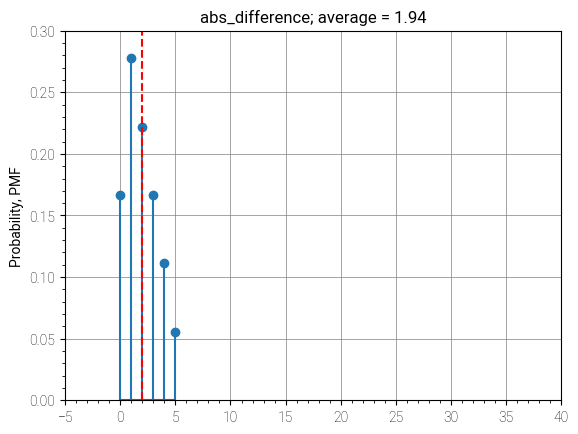

In [23]:
plot_stem(df, 'abs_difference') # 绘制绝对差的茎叶图

## (X1 - 3)**2 + (X2 - 3.5)**2 表示的圆

[0.5, 2.5, 4.5, 6.5, 8.5, 12.5]


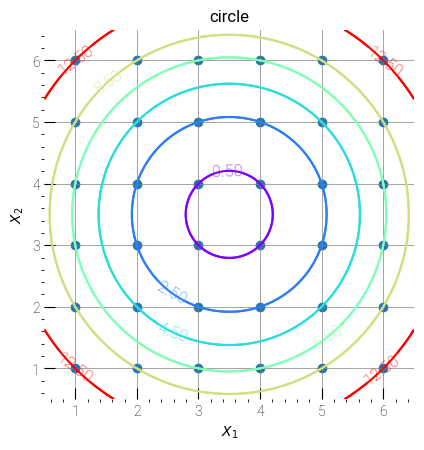

In [24]:
df['circle'] = (df['X1'] - 3.5) ** 2 + (df['X2'] - 3.5) ** 2 # 计算圆的方程
YY_circle = (XX1_fine - 3.5) ** 2 + (XX2_fine - 3.5) ** 2 # 设置Y为圆的方程
plot_contour(XX1, XX2, df, 'circle', XX1_fine, XX2_fine, YY_circle) # 绘制等高线图

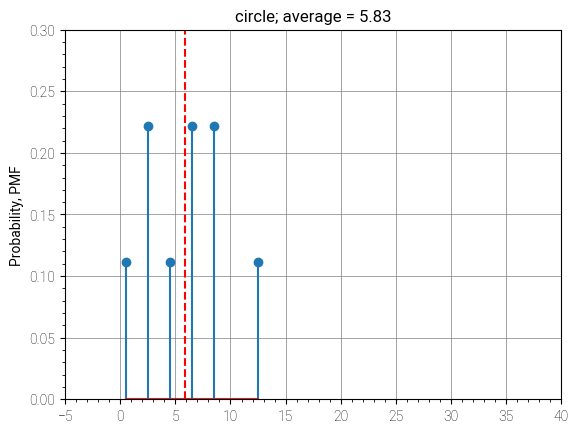

In [25]:
plot_stem(df, 'circle') # 绘制圆的茎叶图